In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [12]:
unemployment = pd.read_csv('UNRATENSA.csv')

In [14]:
unemployment.head()

,DATE,UNRATENSA
0,1948-01-01,4.0
1,1948-02-01,4.7
2,1948-03-01,4.5
3,1948-04-01,4.0
4,1948-05-01,3.4


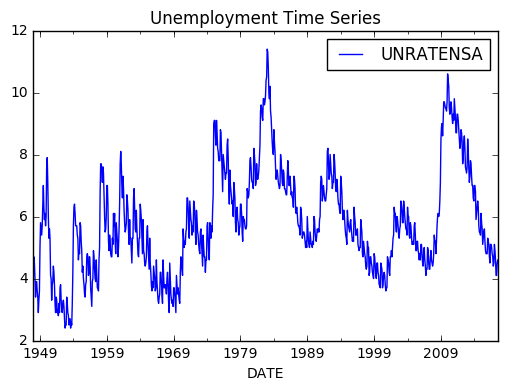

In [18]:
unemployment.index = pd.to_datetime(unemployment.DATE)
unemployment.plot()
plt.title('Unemployment Time Series')
plt.show()

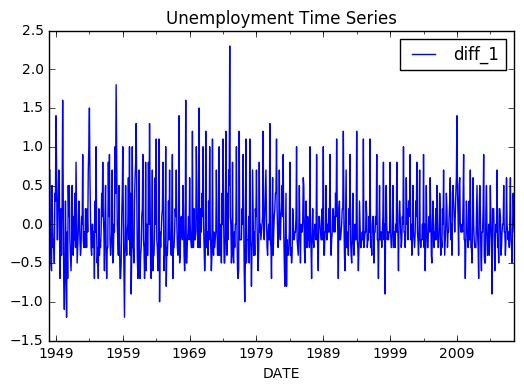

In [21]:
unemployment['diff_1'] = unemployment.UNRATENSA - unemployment.UNRATENSA.shift()
unemployment.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

In [49]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(center=False,window=12).mean()
    rolstd = timeseries.rolling(center=False,window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

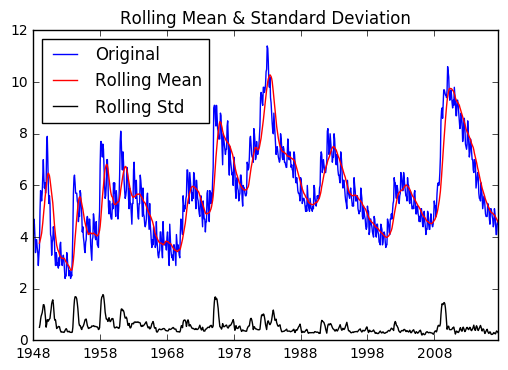

Results of Dickey-Fuller Test:
Test Statistic                  -2.655407
p-value                          0.082078
#Lags Used                      21.000000
Number of Observations Used    814.000000
Critical Value (10%)            -2.568664
Critical Value (5%)             -2.865097
Critical Value (1%)             -3.438409
dtype: float64


In [50]:
test_stationarity(unemployment.UNRATENSA)

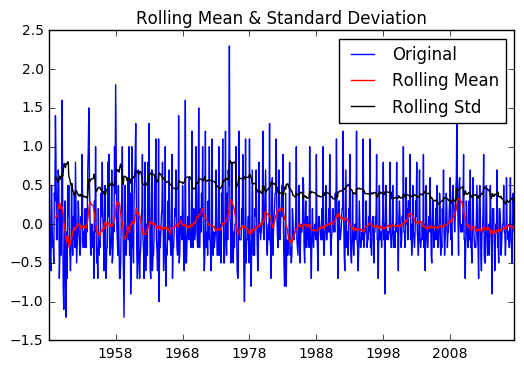

Results of Dickey-Fuller Test:
Test Statistic                -7.741372e+00
p-value                        1.059722e-11
#Lags Used                     2.000000e+01
Number of Observations Used    8.140000e+02
Critical Value (10%)          -2.568664e+00
Critical Value (5%)           -2.865097e+00
Critical Value (1%)           -3.438409e+00
dtype: float64


In [52]:
test_stationarity(unemployment.diff_1[1:])